# Population by commune

In [3]:
from pynsee.geodata import *

import geopandas as gpd
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes

In [4]:
# get geographical data list
geodata_list = get_geodata_list()
# get departments geographical limits
com = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:commune')

Previously saved data used
C:\Users\hadrilec\AppData\Local/pynsee/pynsee/2ac583be54e866b2b1b30fb0113c1fd0.csv
Set update=True to get the most up-to-date data
Previously saved data used
C:\Users\hadrilec\AppData\Local/pynsee/pynsee/d64a941ae07b7f39b02b9d5fd1828888.csv
Set update=True to get the most up-to-date data


In [5]:
map = gpd.GeoDataFrame(com).set_crs("EPSG:4326")
map['REF_AREA'] = 'D' + map['insee_dep']

map = map.to_crs(epsg=3035)
map["area"] = map['geometry'].area / 10**6
map = map.to_crs(epsg=4326)

map['density'] = map['population'] / map["area"]

In [11]:
map.loc[map.density < 40, 'range'] = "< 40"
map.loc[map.density >= 20000, 'range'] = "> 20 000"

density_ranges = [40, 50, 70, 100, 120, 160, 200, 240, 260, 410, 600, 1000, 5000, 20000]
list_ranges = []
list_ranges.append( "< 40")

for i in range(len(density_ranges)-1):
    min_range = density_ranges[i]
    max_range = density_ranges[i+1]
    range_string = "[{}, {}[".format(min_range, max_range)
    map.loc[(map.density >= min_range) & (map.density < max_range), 'range'] = range_string
    list_ranges.append(range_string)

list_ranges.append("> 20 000")

map['range'] = map['range'].astype(CategoricalDtype(categories=list_ranges, ordered=True))  
map = map[~map["insee_dep"].isin(['971', '972', '973', '974', '975', '976'])]

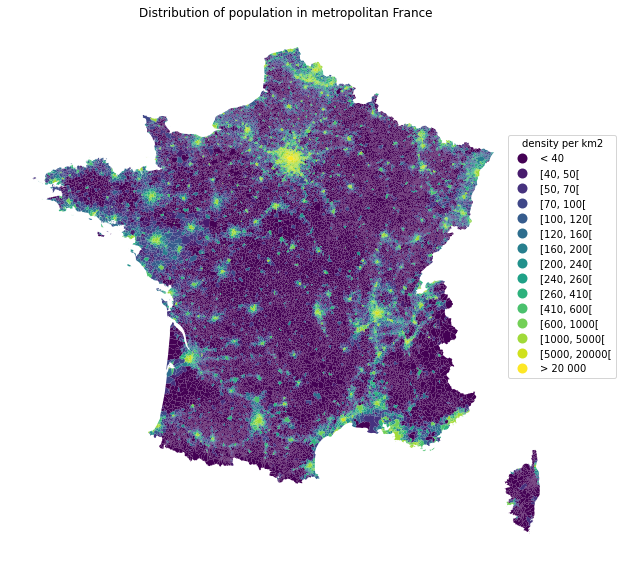

In [12]:
fig, ax = plt.subplots(1,1,figsize=[10,10])
map.plot(column='range', cmap=cm.viridis,
    legend=True, ax=ax,
    legend_kwds={'bbox_to_anchor': (1.1, 0.8),
                 'title':'density per km2'})
ax.set_axis_off()
ax.set(title='Distribution of population in metropolitan France')
plt.show()